# Medical Appointments No Show Analysis

- This is a publicly available data set on Kaggle. The purpose of this analysis is to come up with relevant insights that help to determine the likely reasons why patients were not showing up for the scheduled doctors appointments and also come up with possible actionable recommendations to reduce this in the future. 

In [11]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series as SR,DataFrame as DF
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

### Import Data

In [13]:
## import csv data and viewing a random rows
data = pd.read_csv('desktop/No_Shows.csv')
data.sample(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
75504,4.951320e+12,5736371,F,2016-05-25T08:15:23Z,2016-05-25T00:00:00Z,55,NOVA PALESTINA,0,1,1,0,0,0,No
101385,4.727450e+11,5764384,F,2016-06-02T10:11:32Z,2016-06-02T00:00:00Z,47,MARIA ORTIZ,0,0,0,0,0,0,No
21199,4.754330e+11,5672284,M,2016-05-09T07:52:44Z,2016-05-09T00:00:00Z,30,REDENÇÃO,0,0,0,0,0,0,No
3776,5.797950e+13,5684448,F,2016-05-11T08:37:31Z,2016-05-11T00:00:00Z,4,RESISTÊNCIA,0,0,0,0,0,0,No


In [14]:
##saving a copy of the original csv
copy = data.copy

### Data Cleaning and Exploratory Data Analysis 

In [16]:
## check column and rows
data.shape

print("There are {} rows and {} columns in the dataset".format(data.shape[0], data.shape[1]))

There are 110527 rows and 14 columns in the dataset


In [17]:
##identify nulls and data type for amendments
data.info()

##There are no null datas
## change data type for 'AppointmentDay', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' as they are not supposed to be object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
data.describe()

##outlier in age that will be replaced with the mean value

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
##Finding duplicate data
data.duplicated().sum()
print("There are {} duplicates".format(data.duplicated().sum())) 

There are 0 duplicates


In [20]:
## view column names for possible changes
data.columns

## rename hipertension, handcap and no-show

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [21]:
##Renaming column names
data.rename(columns= {'Hipertension': 'Hypertension', 'Handcap': 'Disability', 'No-show': 'No_Show'}, inplace=True)
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [22]:
##Changing data types and verifying change
data['ScheduledDay'] = pd.to_datetime(data.ScheduledDay)
data['AppointmentDay'] = pd.to_datetime(data.AppointmentDay)
data['PatientId'] = data['PatientId'].astype(int)
data['Scholarship'] = data['Scholarship'].astype(str)
data['Hypertension'] = data['Hypertension'].astype(str)
data['Diabetes'] = data['Diabetes'].astype(str)
data['Alcoholism'] = data['Alcoholism'].astype(str)
data['Disability'] = data['Disability'].astype(str)
data['SMS_received'] = data['SMS_received'].astype(str)
data.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                    object
Hypertension                   object
Diabetes                       object
Alcoholism                     object
Disability                     object
SMS_received                   object
No_Show                        object
dtype: object

In [23]:
# Dropping 'AppointmentID' as its not relevant to my analysis.

data.drop(['AppointmentID'], axis=1, inplace=True)
data.head(3) ##verification

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show
0,29872500000000,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [24]:
##locate outlier value in Age column
data[data['Age']<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show
99832,465943000000000,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [25]:
##replace outlier with Age mean and verifying change
data['Age'].replace(-1, 37, inplace=True)
data.loc[99832] 

PatientId                   465943000000000
Gender                                    F
ScheduledDay      2016-06-06 08:58:13+00:00
AppointmentDay    2016-06-06 00:00:00+00:00
Age                                      37
Neighbourhood                         ROMÃO
Scholarship                               0
Hypertension                              0
Diabetes                                  0
Alcoholism                                0
Disability                                0
SMS_received                              0
No_Show                                  No
Name: 99832, dtype: object

In [26]:
##Rearranging Columns
data = data[['PatientId', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 
      'Diabetes', 'Alcoholism', 'Disability', 'SMS_received', 'No_Show','AppointmentDay', 'ScheduledDay']]
data.sample(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay
8025,6124590000000,F,9,JESUS DE NAZARETH,0,0,0,0,0,0,No,2016-05-20 00:00:00+00:00,2016-05-19 08:18:42+00:00
98601,851548000000000,M,30,SANTA MARTHA,0,0,0,0,0,0,No,2016-06-03 00:00:00+00:00,2016-06-01 08:39:59+00:00
60332,3729320000000,M,20,SANTO ANDRÉ,0,0,0,0,0,0,No,2016-05-13 00:00:00+00:00,2016-05-12 11:19:29+00:00


In [27]:
##Appointment time stripped to retreve just the date
data['ScheduledDay'] = data.ScheduledDay.dt.strftime('%Y-%m-%d')
data['AppointmentDay'] = data.AppointmentDay.dt.strftime('%Y-%m-%d')
data.head(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay
0,29872500000000,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558998000000000,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262960000000,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29


In [28]:
data.dtypes

## Schedule and Appointment day data types need to be converted again

PatientId          int64
Gender            object
Age                int64
Neighbourhood     object
Scholarship       object
Hypertension      object
Diabetes          object
Alcoholism        object
Disability        object
SMS_received      object
No_Show           object
AppointmentDay    object
ScheduledDay      object
dtype: object

In [29]:
data['ScheduledDay'] = pd.to_datetime(data.ScheduledDay)
data['AppointmentDay'] = pd.to_datetime(data.AppointmentDay)
data.dtypes ##verfication

PatientId                  int64
Gender                    object
Age                        int64
Neighbourhood             object
Scholarship               object
Hypertension              object
Diabetes                  object
Alcoholism                object
Disability                object
SMS_received              object
No_Show                   object
AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object

In [30]:
##verify period of analysis

data['ScheduledDay'].sort_values().unique()

##from November 2015 - June 2016 i.e. 7 months period

<DatetimeArray>
['2015-11-10 00:00:00', '2015-12-03 00:00:00', '2015-12-07 00:00:00',
 '2015-12-08 00:00:00', '2015-12-14 00:00:00', '2015-12-15 00:00:00',
 '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-07 00:00:00',
 '2016-01-11 00:00:00',
 ...
 '2016-05-25 00:00:00', '2016-05-30 00:00:00', '2016-05-31 00:00:00',
 '2016-06-01 00:00:00', '2016-06-02 00:00:00', '2016-06-03 00:00:00',
 '2016-06-04 00:00:00', '2016-06-06 00:00:00', '2016-06-07 00:00:00',
 '2016-06-08 00:00:00']
Length: 111, dtype: datetime64[ns]

In [31]:
##verify period of analysis

data['AppointmentDay'].sort_values().unique()

##from April 2016 - June 2016 i.e. 2 months period


<DatetimeArray>
['2016-04-29 00:00:00', '2016-05-02 00:00:00', '2016-05-03 00:00:00',
 '2016-05-04 00:00:00', '2016-05-05 00:00:00', '2016-05-06 00:00:00',
 '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00',
 '2016-05-12 00:00:00', '2016-05-13 00:00:00', '2016-05-14 00:00:00',
 '2016-05-16 00:00:00', '2016-05-17 00:00:00', '2016-05-18 00:00:00',
 '2016-05-19 00:00:00', '2016-05-20 00:00:00', '2016-05-24 00:00:00',
 '2016-05-25 00:00:00', '2016-05-30 00:00:00', '2016-05-31 00:00:00',
 '2016-06-01 00:00:00', '2016-06-02 00:00:00', '2016-06-03 00:00:00',
 '2016-06-06 00:00:00', '2016-06-07 00:00:00', '2016-06-08 00:00:00']
Length: 27, dtype: datetime64[ns]


#### If the earliest appointment date is April 2016, when appointment schedules began in November 2015, then it suggests a long waiting period before patients get to see the doctor, which may likely influence a patients decision to not show up for their appointment, but we will look further into this later on.

In [33]:
data.head(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay
0,29872500000000,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558998000000000,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262960000000,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29


In [34]:
##Lets calculate a date difference to determine and create a wait period column
data['Wait_Period'] = data['AppointmentDay'] - data['ScheduledDay']
data['Wait_Period'] = data['Wait_Period'].dt.days
data.head(2)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period
0,29872500000000,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,558998000000000,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0


In [35]:
##determine if there are any outliers i.e. any schedule days before appointment days
data[data['Wait_Period'] < 0]
##There are 5 outliers and they will be dropped from the data set

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period
27033,7839270000000,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,2016-05-10,-1
55226,7896290000000,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,2016-05-18,-1
64175,24252300000000,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-05,-1
71533,998232000000000,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-11,-6
72362,3787480000000,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,2016-05-04,-1


In [36]:
##drop outlier data and verify
data.drop([27033, 55226, 64175, 71533, 72362], inplace=True)
data[data['Wait_Period'] < 0]

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period


In [37]:
##Add day name column to determine its impact on no show

data['AppointmentMonth_Name'] = data['AppointmentDay'].dt.month_name()
data['AppointmentDay_Name'] = data['AppointmentDay'].dt.day_name()
data.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
0,29872500000000,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,April,Friday
1,558998000000000,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,April,Friday
2,4262960000000,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,April,Friday
3,867951000000,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,April,Friday
4,8841190000000,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0,April,Friday


In [38]:
##Change Gender abbreviation and verify
data['Gender'].replace({'F':'Female', 'M':'Male'}, inplace=True)
data.sample(5)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
99105,227585000000000,Female,22,BELA VISTA,0,0,0,0,0,1,No,2016-06-08,2016-06-02,6,June,Wednesday
6204,924422000000,Male,5,MARUÍPE,0,0,0,0,0,0,No,2016-05-16,2016-05-12,4,May,Monday
89897,6972620000000,Female,35,BONFIM,0,1,1,1,0,0,No,2016-06-06,2016-06-06,0,June,Monday
63854,676423000000,Male,32,TABUAZEIRO,0,0,0,0,0,0,No,2016-05-09,2016-05-09,0,May,Monday
85582,94173700000000,Male,43,SANTO ANTÔNIO,0,0,0,0,0,1,No,2016-06-08,2016-05-16,23,June,Wednesday


## Brief Facts about Patients that did not show up for their appointments

### What is the patient no_show distribution?

In [40]:

No_Show_ratio = data['No_Show'].value_counts()
No_Show_ratio


No_Show
No     88208
Yes    22314
Name: count, dtype: int64

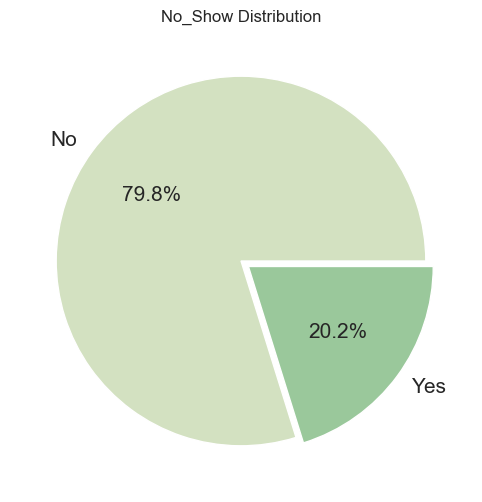

In [41]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('No_Show Distribution')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.05]

plt.pie(No_Show_ratio, labels=No_Show_ratio.index, colors = palette_color, explode=explode, autopct='%.1f%%');


#### 20% of the patients did not show up for their scheduled appointment

## Analysis and Insights

## What is the average waiting period?

- The purpose of this analysis is to determine if wait period could be influencing patients to not show up for their appointment.



In [45]:

data['Wait_Period'].mean()
print('The average waiting period is {:.0f} days'.format(data['Wait_Period'].mean()))


The average waiting period is 10 days


#### Lets analyse if patients that waited 10 days or more were likely to show up for their appointments compared to those that waited less

In [47]:
less_avg = data[data['Wait_Period']<10]
less_avg.sample(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
105652,8362680000000,Female,74,JOANA D´ARC,0,0,0,0,0,1,Yes,2016-06-03,2016-05-25,9,June,Friday
63212,543800000000000,Female,58,JARDIM CAMBURI,0,0,0,0,0,0,No,2016-05-20,2016-05-20,0,May,Friday
28149,8196780000000,Female,42,REDENÇÃO,0,1,0,0,0,1,Yes,2016-05-24,2016-05-19,5,May,Tuesday


In [48]:
same_day = data[data['Wait_Period']==0]
same_day.sample(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
53678,37399000000000,Male,17,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-05-17,2016-05-17,0,May,Tuesday
78319,3326680000000,Female,66,SANTA MARTHA,0,1,0,0,0,0,No,2016-05-09,2016-05-09,0,May,Monday
20527,3881400000000,Female,24,SANTO ANTÔNIO,0,0,0,0,0,0,No,2016-05-04,2016-05-04,0,May,Wednesday


In [49]:
Avg_Wait = data[data['Wait_Period']>=10]
Avg_Wait.sample(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
46985,535739000000000,Female,16,JABOUR,0,0,0,0,0,1,No,2016-05-25,2016-04-25,30,May,Wednesday
56377,3437350000000,Female,52,SÃO BENEDITO,0,1,0,0,0,1,No,2016-05-31,2016-04-29,32,May,Tuesday
70125,711693000000,Female,44,JARDIM DA PENHA,0,0,0,0,1,0,Yes,2016-05-20,2016-03-01,80,May,Friday


In [50]:
print("{} patients had to wait 10 days and above to meet with a doctor.".format(Avg_Wait['PatientId'].nunique()))

27781 patients had to wait 10 days and above to meet with a doctor.


The number of Patients that showed up when they had to wait a minimum of 10 days:

No_Show
No     24197
Yes    11640
Name: count, dtype: int64

Percentage distribution: 

Percentage of Patients that showed Up => 67.52%
Percentage of Patients that missed their appointment => 32.48%



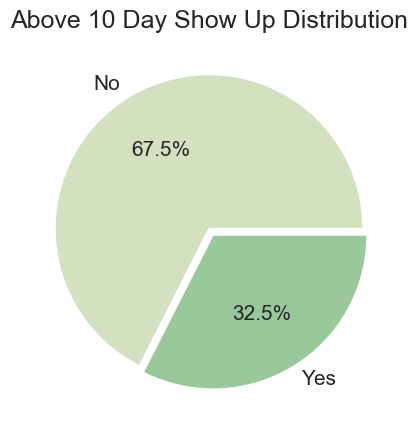

In [51]:
print("The number of Patients that showed up when they had to wait a minimum of 10 days:\n")
print(Avg_Wait['No_Show'].value_counts())

print("\nPercentage distribution: \n")
show = Avg_Wait['No_Show'].value_counts()[0]/(Avg_Wait['No_Show'].value_counts()[0]+Avg_Wait['No_Show'].value_counts()[1])
print("Percentage of Patients that showed Up => {:.2f}%".format(show*100))
noshow = Avg_Wait['No_Show'].value_counts()[1]/(Avg_Wait['No_Show'].value_counts()[0]+ Avg_Wait['No_Show'].value_counts()[1])
print("Percentage of Patients that missed their appointment => {:.2f}%\n".format(noshow*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('Above 10 Day Show Up Distribution')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.05]

plt.pie(Avg_Wait['No_Show'].value_counts(), labels= Avg_Wait['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');



### Now lets look at the percentage distribution for patients that had to wait less than the average wait period

The number of Patients that showed up when they had to wait a minimum of 10 days:

No_Show
No     64011
Yes    10674
Name: count, dtype: int64

Percentage distribution: 

Percentage of Patients that showed Up => 85.71%
Percent of Patients that missed their appointment => 14.29%



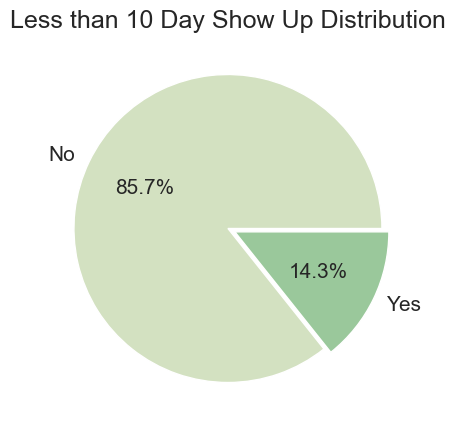

In [53]:
print("The number of Patients that showed up when they had to wait a minimum of 10 days:\n")
print(less_avg['No_Show'].value_counts())

print("\nPercentage distribution: \n")
show = less_avg['No_Show'].value_counts()[0]/(less_avg['No_Show'].value_counts()[0]+ less_avg['No_Show'].value_counts()[1])
print("Percentage of Patients that showed Up => {:.2f}%".format(show*100))
noshow = less_avg['No_Show'].value_counts()[1]/(less_avg['No_Show'].value_counts()[0]+ less_avg['No_Show'].value_counts()[1])
print("Percent of Patients that missed their appointment => {:.2f}%\n".format(noshow*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('Less than 10 Day Show Up Distribution')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.05]

plt.pie(less_avg['No_Show'].value_counts(), labels= less_avg['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


### Now lets look at the percentage distribution for patients that had same day appointments

The number of Patients that showed up when they had to wait a minimum of 10 days:

No_Show
No     36771
Yes     1792
Name: count, dtype: int64

Percentage distribution: 

Percentage of Patients that showed Up => 95.35%
Percent of Patients that missed their appointment => 4.65%



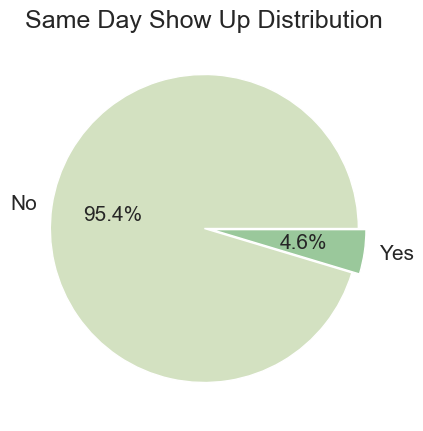

In [55]:
print("The number of Patients that showed up when they had to wait a minimum of 10 days:\n")
print(same_day['No_Show'].value_counts())

print("\nPercentage distribution: \n")
show = same_day['No_Show'].value_counts()[0]/(same_day['No_Show'].value_counts()[0]+ same_day['No_Show'].value_counts()[1])
print("Percentage of Patients that showed Up => {:.2f}%".format(show*100))
noshow = same_day['No_Show'].value_counts()[1]/(same_day['No_Show'].value_counts()[0]+ same_day['No_Show'].value_counts()[1])
print("Percent of Patients that missed their appointment => {:.2f}%\n".format(noshow*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('Same Day Show Up Distribution')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(same_day['No_Show'].value_counts(), labels= same_day['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');




#### From the above, it can be said that the longer the wait period, the more likely the chances that the patients will not show up for their appointment. As can be seen from above, as the wait period reduces so does the no show ups. 
#### Thus, the hospital should look into its wait period and reduce the period as much as possible so that more patients will show up for their appointments.

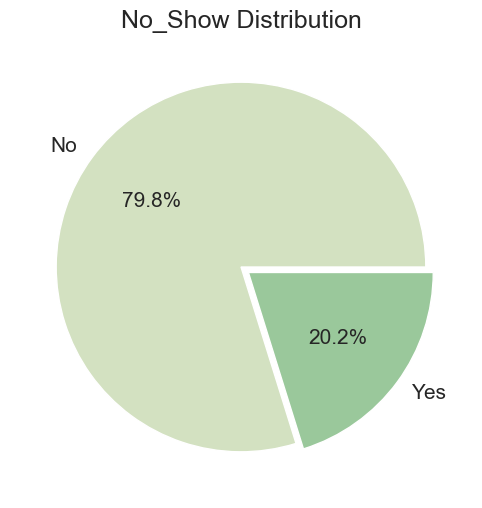

In [57]:
No_Show_ratio = data['No_Show'].value_counts()
No_Show_ratio

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('No_Show Distribution')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.05]

plt.pie(No_Show_ratio, labels=No_Show_ratio.index, colors = palette_color, explode=explode, autopct='%.1f%%');

#### 20% of the patients did not show up for their scheduled appointment

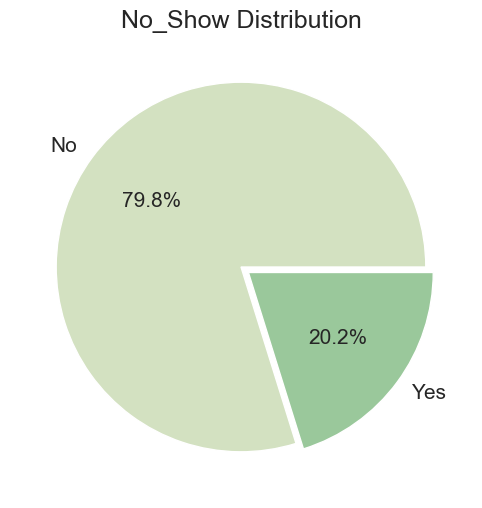

In [58]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('No_Show Distribution')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.05]

plt.pie(No_Show_ratio, labels=No_Show_ratio.index, colors = palette_color, explode=explode, autopct='%.1f%%');



#### 20% of the patients did not show up for their scheduled appointment

## Could patients be intentionally missing their appointments?
#### To ascertain this, I will be extracting all the data of patients that did not show up for their appointments. Then we will examine their data to identify possible characteristics or factor that may have influenced their decision to miss their scheduled appointments.

In [61]:
##Data of all patients that did not show up for their scheduled appointments
All_No_Shows = data[data['No_Show']=='Yes']
All_No_Shows.sample(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
6582,13344600000000,Male,55,JARDIM CAMBURI,0,1,0,0,0,1,Yes,2016-05-25,2016-05-19,6,May,Wednesday
93922,298950000000,Female,34,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-06-03,2016-06-02,1,June,Friday
44145,571228000000000,Male,0,SÃO JOSÉ,0,0,0,0,0,0,Yes,2016-05-31,2016-05-25,6,May,Tuesday


In [62]:
##Data of all patients that showed up for their scheduled appointments
All_Shows = data[data['No_Show']=='No']
All_Shows.sample(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
18672,896776000000000,Male,32,FORTE SÃO JOÃO,0,0,0,0,0,0,No,2016-05-03,2016-05-03,0,May,Tuesday
68430,211693000000000,Male,68,MARIA ORTIZ,0,0,0,0,0,0,No,2016-05-25,2016-05-25,0,May,Wednesday
44265,21965600000000,Female,31,SÃO BENEDITO,0,0,0,1,0,1,No,2016-05-03,2016-03-03,61,May,Tuesday


In [63]:
## Top 5 No_shows data will be examined for any patterns that may indicate why they are missing their appointments 
All_No_Shows['PatientId'].value_counts().head(5)

PatientId
1421990000000      18
563514000000000    16
5587790000000      15
581197000000000    14
65751400000000     13
Name: count, dtype: int64

#### Now we will retrieve the data of the 5 patients that had the highest missed appointment for analysis.

In [65]:
data[data['PatientId']==1421990000000]

##there is one incorrect patient data in index 73736

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
53206,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53218,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53323,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53381,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-25,2016-05-25,0,May,Wednesday
53387,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53400,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53418,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
70906,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-25,2016-05-25,0,May,Wednesday
70914,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
70935,1421990000000,Male,9,SÃO BENEDITO,0,0,0,0,1,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday


In [66]:
data[data['PatientId']==563514000000000]

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
53214,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53217,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53322,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53384,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-25,2016-05-25,0,May,Wednesday
53395,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53408,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
70910,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-25,2016-05-25,0,May,Wednesday
70922,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
70941,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
90522,563514000000000,Male,9,SÃO JOSÉ,1,0,0,0,0,0,Yes,2016-06-01,2016-06-01,0,June,Wednesday


In [67]:
data[data['PatientId']==5587790000000]

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
53202,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53220,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53265,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53316,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53345,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,No,2016-05-06,2016-05-06,0,May,Friday
53351,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-13,2016-05-13,0,May,Friday
53357,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-20,2016-05-20,0,May,Friday
53435,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,No,2016-05-06,2016-05-06,0,May,Friday
53446,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-20,2016-05-20,0,May,Friday
53450,5587790000000,Male,14,SANTA TEREZA,0,0,0,0,0,0,Yes,2016-05-13,2016-05-13,0,May,Friday


In [68]:
data[data['PatientId']==581197000000000]

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
53201,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53219,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53315,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
53388,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-25,2016-05-25,0,May,Wednesday
53401,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
53403,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
70896,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-11,2016-05-11,0,May,Wednesday
70915,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-25,2016-05-25,0,May,Wednesday
70936,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-05-04,2016-05-04,0,May,Wednesday
90533,581197000000000,Female,7,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-06-08,2016-06-08,0,June,Wednesday


In [69]:
data[data['PatientId']==65751400000000]

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_Show,AppointmentDay,ScheduledDay,Wait_Period,AppointmentMonth_Name,AppointmentDay_Name
53231,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-05,2016-05-05,0,May,Thursday
53238,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-19,2016-05-19,0,May,Thursday
53241,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-12,2016-05-12,0,May,Thursday
53313,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-12,2016-05-12,0,May,Thursday
53522,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-31,2016-05-31,0,May,Tuesday
53540,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-20,2016-05-20,0,May,Friday
53553,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-13,2016-05-13,0,May,Friday
53581,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-06,2016-05-06,0,May,Friday
53738,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-13,2016-05-13,0,May,Friday
53749,65751400000000,Male,14,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes,2016-05-20,2016-05-20,0,May,Friday


### All the top 5 patients that did not show up for their appointments are **minors** (7 and 14 year olds) and all, except 1, did not show up for any appointment they were scheduled to attend. 

#### As minors are unlikely to transport themselves to the appointment and handle the processes on their own, then it can be assumed that their adult parent or guardian that scheduled these appointment on the child's behalf was unable to make the appointment. 
#### This may also be due to the fact that all these minors, except 1, had no scholarship and had to pay out of pocket. Thus, maybe the adults self medicated and did not want to bare the burden of paying for a treatment they considered minor.
#### This no show ups may be considered intentional because they had same day day appointments yet they missed the appointments. To curb this, the hospital may wish to consider introducing a No Show up fine system, where if a patient has exhibited a pattern of not showing up with their or their wards appointments over time they will be required to pay a fine.
#### Also none of the top 5 no_shows received sms to remind them of their appointment, so the hospital should consider sending appointment reminder sms to patients, an hour or 2 before their appointments, which may help them keep to the schedule.

## In light of the above, lets look at the age that missed their appointments the most

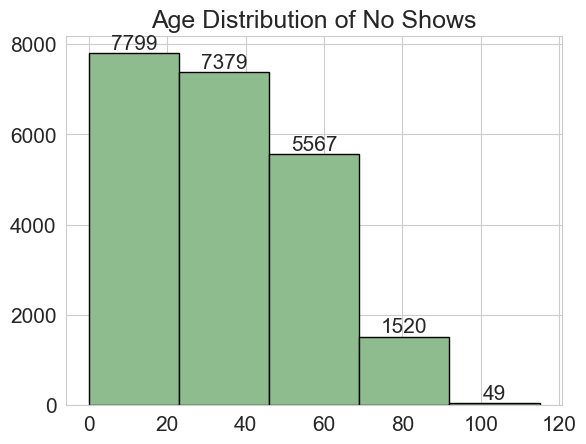

In [72]:
counts, edges, bars = plt.hist(All_No_Shows['Age'], bins=5, edgecolor='black', color='darkseagreen')
plt.bar_label(bars)
plt.title('Age Distribution of No Shows')
plt.rc('font', size=16);

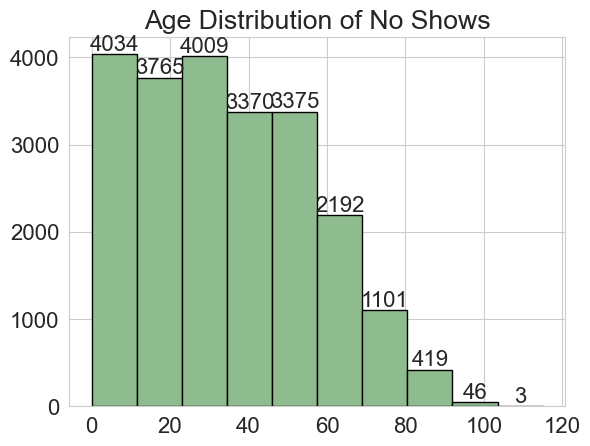

In [73]:
counts, edges, bars = plt.hist(All_No_Shows['Age'], bins=10, edgecolor='black', color='darkseagreen')
plt.bar_label(bars)
plt.title('Age Distribution of No Shows')
plt.rc('font', size=16);

#### This shows that the age group with the highest no shows are minors, young persons and young adults(0 - 20) that require or may require adults assistance to show up for their appointment. Although those over 18 are considered adults they may sometimes be non-chalant with their health except it is very serious or an adult takes charge sometimes. 
#### Should the hospital choose to introduce the no show up fine, parents, guardians and young adults should be informed of the consequences before an appointment is scheduled for the patient.

## Which Neighbourhoods had the most no_shows?


In [76]:
## Lets find out the total Neighbourhoods in the data
print("There are {} `Neighbourhoods`".format(data.Neighbourhood.unique().size))

There are 81 `Neighbourhoods`


In [77]:
##Lets view the Top 10 No Show Neighbourhoods
No_Shows_Neighbourhood = All_No_Shows['Neighbourhood'].value_counts().head(10)
No_Shows_Neighbourhood

Neighbourhood
JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           905
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            572
BONFIM                550
Name: count, dtype: int64

In [78]:
Shows_Neighbourhood = All_Shows['Neighbourhood'].value_counts().head(10)
Shows_Neighbourhood 

Neighbourhood
JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: count, dtype: int64

#### Although neighbourhood proximity may be a factor for patients missing their appointment because the neighbourhood may be far from the hospital and some patients may not be able to make the journey due to price, anxiety or exhaustion. 
#### However, from the above analysis it cannot be conclusively said to be a factor in this case as a reason for patients not showing up for appointments. This is because 6 out of the 10 neighbourhoods that did not show up for their appointment also topped the neighbourhoods that patients showed up for their appointments. It may also mean that the higher the number of apointments to a Neighbour, the higher the chance of show and no show.
#### The hospital may consider offering taxi and ambulance services to pick up patients at a discounted rate. 

## What is the gender distribution of the No Shows?

In [81]:
##Lets view gender distribution
data['Gender'].value_counts()
## The females out number the males

Gender
Female    71837
Male      38685
Name: count, dtype: int64

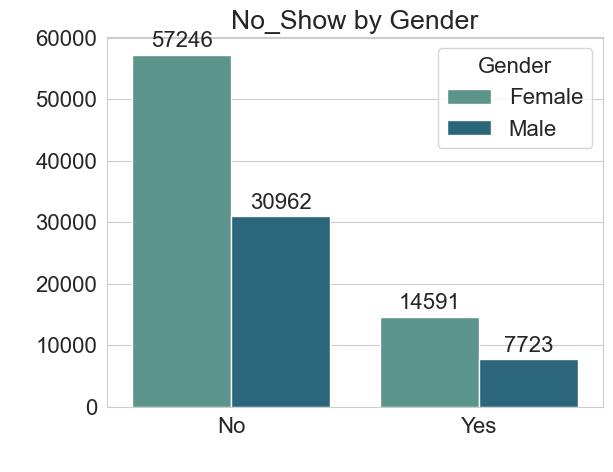

In [82]:
ax = sns.countplot(data=data, x="No_Show", hue="Gender", palette='crest')

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel=' ', ylabel=' ', title='No_Show by Gender')
plt.show()


#### The data has mostly females and they outnumber the males both in missing and not missing their appointments. It can be said that Female patients are more likely to miss their appointments over male patients.



### Now we will perform a time period analysis to determine if:
- Appointment days are a contributing fact for No Shows?
- did same day appointments show up more than longer period show up

In [85]:
data.columns

Index(['PatientId', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Disability', 'SMS_received',
       'No_Show', 'AppointmentDay', 'ScheduledDay', 'Wait_Period',
       'AppointmentMonth_Name', 'AppointmentDay_Name'],
      dtype='object')

In [86]:
##Ordering the day names 


from pandas.api.types import CategoricalDtype 
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data['AppointmentDay_Name'] = data['AppointmentDay_Name'].astype(cat_type)
All_No_Shows['AppointmentDay_Name'] = All_No_Shows['AppointmentDay_Name'].astype(cat_type)
All_Shows['AppointmentDay_Name'] = All_Shows['AppointmentDay_Name'].astype(cat_type)

/var/folders/7_/cfkk29v96g904s9qmrlt76r40000gn/T/ipykernel_1238/2244988609.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_No_Shows['AppointmentDay_Name'] = All_No_Shows['AppointmentDay_Name'].astype(cat_type)
/var/folders/7_/cfkk29v96g904s9qmrlt76r40000gn/T/ipykernel_1238/2244988609.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_Shows['AppointmentDay_Name'] = All_Shows['AppointmentDay_Name'].astype(cat_type)


In [87]:
data['AppointmentDay_Name'].value_counts().sort_index()

AppointmentDay_Name
Monday       22714
Tuesday      25638
Wednesday    25866
Thursday     17246
Friday       19019
Saturday        39
Name: count, dtype: int64

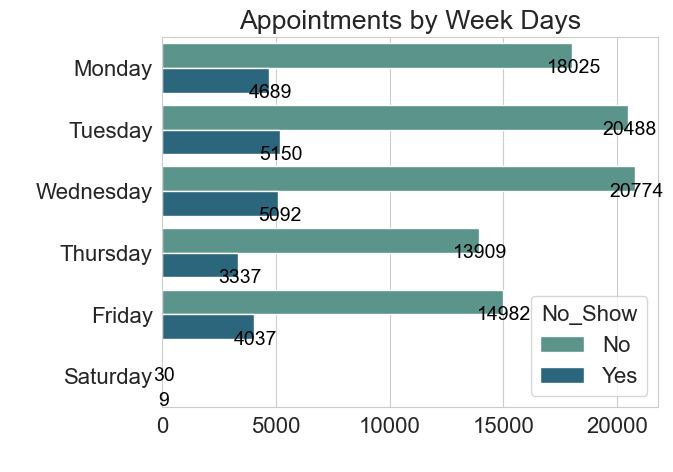

In [88]:
ax = sns.countplot(y='AppointmentDay_Name', data = data, hue="No_Show", palette='crest')

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=14,color='black', 
                ha = 'center', va = 'center', textcoords='offset points', horizontalalignment='center')
    ax.set(xlabel=' ', ylabel=' ', title='Appointments by Week Days')
plt.show()
    

- The hospital is not open on Sundays as there are no appointments booked for Sundays.
- Wednesday has the highest appointments and Saturday has the lowest appointments.
- The higher the appointments booked for the day the more no shows are registered. It may be that some patients showed up and due to the high volume of patients, which may result in longer waiting periods, they left before it was their turn to be attended to.
- Saturday also has very few appointments scheduled in comparison to other week days. The hospital may wish to consider evenly distributing the appointments across the week days and observe if this helps to reduce no show ups, many patients may even be more willing to show up on saturdays as it is a weekend.

In [90]:
data['AppointmentMonth_Name'].value_counts()

AppointmentMonth_Name
May      80836
June     26451
April     3235
Name: count, dtype: int64

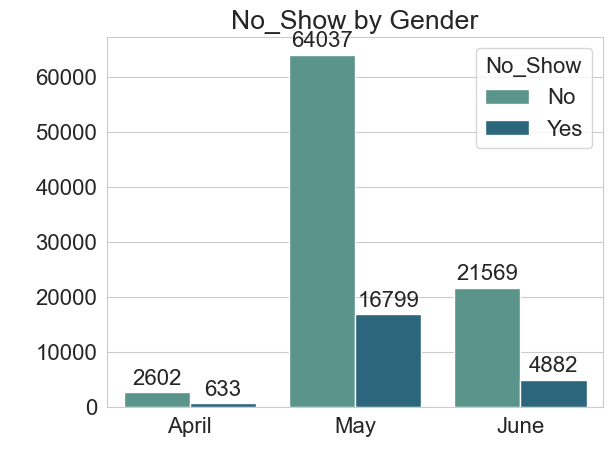

In [91]:
ax = sns.countplot(x='AppointmentMonth_Name', data = data, hue="No_Show", palette='crest')

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel=' ', ylabel=' ', title='No_Show by Gender')
plt.show()

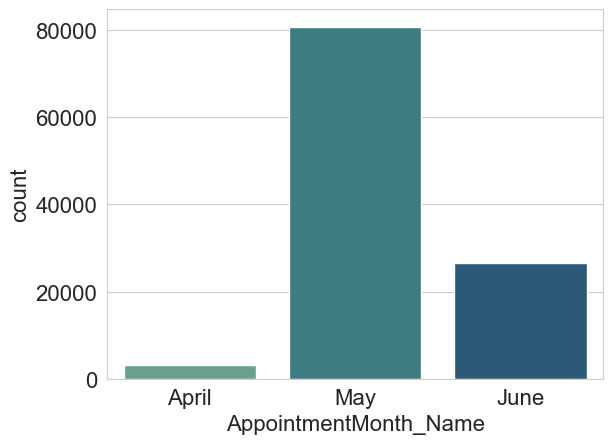

In [92]:
sns.countplot(x='AppointmentMonth_Name', data = data, palette='crest')
for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel=' ', ylabel=' ', title='No_Show by Gender')

plt.show()

/Users/mac/Desktop/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


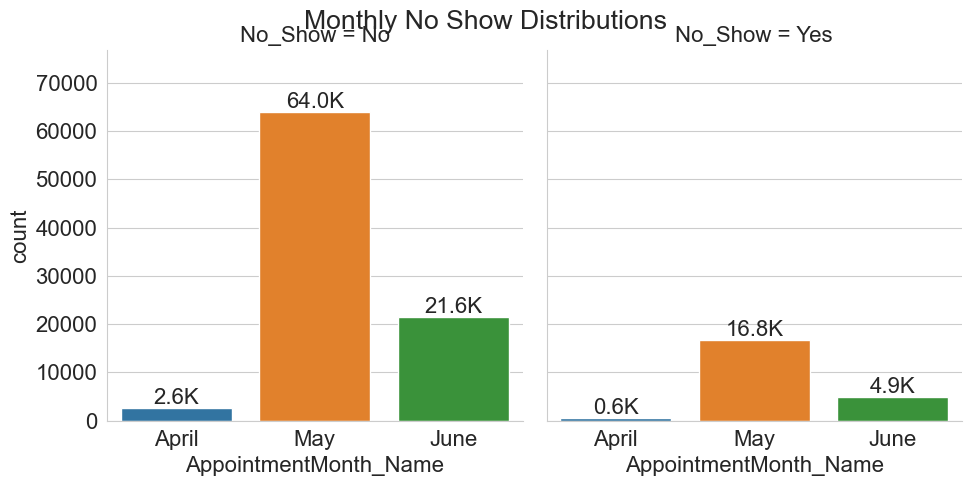

In [93]:

g = sns.catplot(x="AppointmentMonth_Name", # Make the bars horizontal instead of vertical.
            data=data,
            kind="count",
            col="No_Show") # column subplots 

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly No Show Distributions')


# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Is Scholarship a cause for missing appointments?

#### How many patients have insurance covers (i.e. Scholarships)?


In [95]:
print("The number of Patients that have (1) and do not have (0) insurance covers are:\n")
print(data['Scholarship'].value_counts())

Percent = data['Scholarship'].value_counts()[0]/(data['Scholarship'].value_counts()[0] + data['Scholarship'].value_counts()[1])
print("\n{:.0f}% of Patients that have no insurance cover.".format(Percent*100))

The number of Patients that have (1) and do not have (0) insurance covers are:

Scholarship
0    99661
1    10861
Name: count, dtype: int64

90% of Patients that have no insurance cover.


Scholarship
0    19736
1     2578
Name: count, dtype: int64

88% of No Show Patients that have no insurance cover.



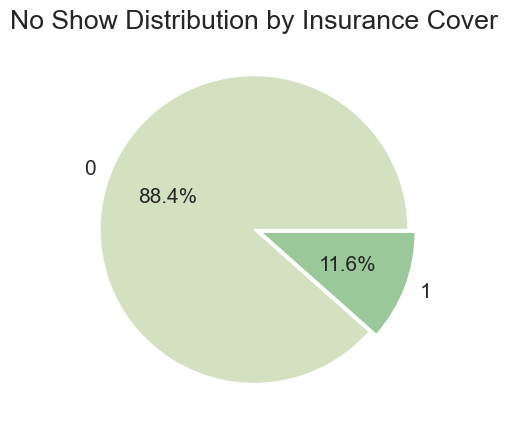

In [96]:
print(All_No_Shows['Scholarship'].value_counts())

Per = All_No_Shows['Scholarship'].value_counts()[0]/(All_No_Shows['Scholarship'].value_counts()[0] + All_No_Shows['Scholarship'].value_counts()[1])
print("\n{:.0f}% of No Show Patients that have no insurance cover.\n".format(Per*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution by Insurance Cover')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(All_No_Shows['Scholarship'].value_counts(), labels= All_No_Shows['Scholarship'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


Scholarship
0    79925
1     8283
Name: count, dtype: int64

91% of Patients that showed up for their appointment have no insurance cover.



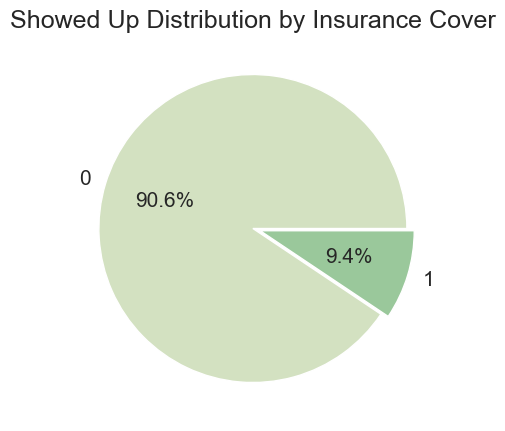

In [97]:
print(All_Shows['Scholarship'].value_counts())

Perc = All_Shows['Scholarship'].value_counts()[0]/(All_Shows['Scholarship'].value_counts()[0] + All_Shows['Scholarship'].value_counts()[1])
print("\n{:.0f}% of Patients that showed up for their appointment have no insurance cover.\n".format(Perc*100))

plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('Showed Up Distribution by Insurance Cover')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(All_Shows['Scholarship'].value_counts(), labels= All_Shows['Scholarship'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


#### From the above, it can be said that lack of insurance cover is not likely cause for missed appointments because the percentage for missed appointments for patients for no insurance cover is even lower than patients with no insurance cover that showed up for their appointments. 
#### Patients with insurance cover that did not show up were more than those that showed up with insurance cover. Thus, it can be inferred that a patient may likely miss their appointment if they have insurance cover but its no guarantee.

## Is illness a cause for missing appointments?

In [100]:
Hypertensives = data[data['Hypertension']=='1']
Diabetics =data[data['Diabetes']=='1']
Alcoholics =data[data['Alcoholism']=='1']
Disabled =data[data['Disability']=='1']

Lets dive deeper to view how the No Show distribution is for each ailments.

No_Show
No     18029
Yes     3772
Name: count, dtype: int64

17% of No Show Patients that have Hypertension.



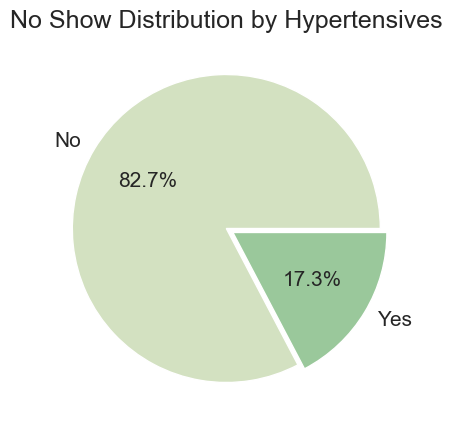

In [102]:

print(Hypertensives['No_Show'].value_counts())

HBP = Hypertensives['No_Show'].value_counts()[1]/(Hypertensives['No_Show'].value_counts()[0] + Hypertensives['No_Show'].value_counts()[1])
print("\n{:.0f}% of No Show Patients that have Hypertension.\n".format(HBP*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution by Hypertensives')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(Hypertensives['No_Show'].value_counts(), labels= Hypertensives['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


No_Show
No     6513
Yes    1430
Name: count, dtype: int64

18% of No Show Patients that have Diabetes.



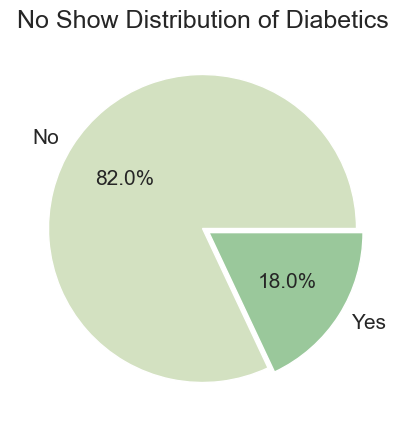

In [103]:

print(Diabetics['No_Show'].value_counts())

BS = Diabetics['No_Show'].value_counts()[1]/(Diabetics['No_Show'].value_counts()[0] + Diabetics['No_Show'].value_counts()[1])
print("\n{:.0f}% of No Show Patients that have Diabetes.\n".format(BS*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution of Diabetics')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(Diabetics['No_Show'].value_counts(), labels= Diabetics['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


No_Show
No     2683
Yes     677
Name: count, dtype: int64

20% of No Show Patients that have Alcoholism.



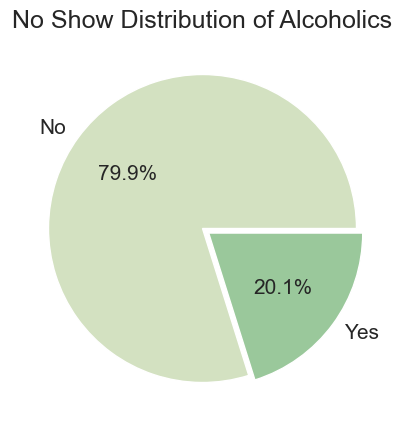

In [104]:
Alcoholics['No_Show'].value_counts()

print(Alcoholics['No_Show'].value_counts())

Alc = Alcoholics['No_Show'].value_counts()[1]/(Alcoholics['No_Show'].value_counts()[0] + Alcoholics['No_Show'].value_counts()[1])
print("\n{:.0f}% of No Show Patients that have Alcoholism.\n".format(Alc*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution of Alcoholics')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(Alcoholics['No_Show'].value_counts(), labels= Alcoholics['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


No_Show
No     1676
Yes     364
Name: count, dtype: int64

18% of No Show Patients that are disabled.



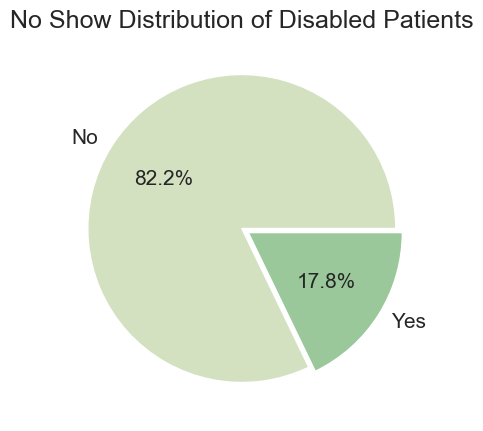

In [105]:
print(Disabled['No_Show'].value_counts())

Dis = Disabled['No_Show'].value_counts()[1]/(Disabled['No_Show'].value_counts()[0] + Disabled['No_Show'].value_counts()[1])
print("\n{:.0f}% of No Show Patients that are disabled.\n".format(Dis*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution of Disabled Patients')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(Disabled['No_Show'].value_counts(), labels= Disabled['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


#### Ailment may be a factor but cannot be conclusively confirmed because patients with all these ailments that showed up were considerably higher than those that missed their appointments. 
#### However, considering these ailments seriousness, the No Show percentage is high as it ranges from 17 - 20%, and patients need to be more serious with their check ups to keep these diseases under control to avoid further progress or more complications. Thus, these patients are expected to take their appointments seriously due to their ailments and not miss their doctors appointments. 
#### In light of the above, the hospital may wish to consider sending friendly reminders texts to patients in these categories a day and hours before their scheduled appointments and letting them know its important to make their appointments.

## The impact of text reminders to No Show

In [108]:
data.columns

Index(['PatientId', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Disability', 'SMS_received',
       'No_Show', 'AppointmentDay', 'ScheduledDay', 'Wait_Period',
       'AppointmentMonth_Name', 'AppointmentDay_Name'],
      dtype='object')

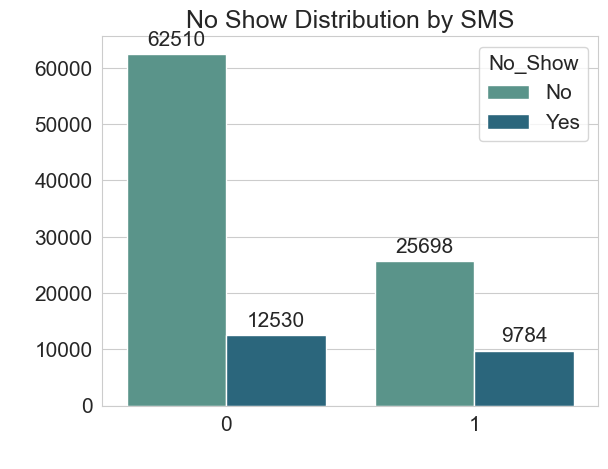

In [109]:
ax = sns.countplot(data=data, x="SMS_received", hue="No_Show", palette='crest')

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel=' ', ylabel=' ', title='No Show Distribution by SMS')
plt.show()

#### From the above chart, a large portion of the patient population did not receive a reminder text message from the hospital. Lets look at the percentage distribution.

In [111]:
data['SMS_received'].value_counts()

SMS_received
0    75040
1    35482
Name: count, dtype: int64

In [112]:
print("The number of Patients that did and did not receive SMS text are:\n")
print(data['SMS_received'].value_counts())

print("\nPercentage distribution: \n")
text = data['SMS_received'].value_counts()[0]/(data['SMS_received'].value_counts()[0]+ data['SMS_received'].value_counts()[1])
print("The Percentage of Patients that did not receive SMS text is => {:.2f}%".format(text*100))


The number of Patients that did and did not receive SMS text are:

SMS_received
0    75040
1    35482
Name: count, dtype: int64

Percentage distribution: 

The Percentage of Patients that did not receive SMS text is => 67.90%


#### 68% of patients did not receive text message. Lets see how this breakdown in show up further.

In [114]:
text = data[data['SMS_received'] == '1']
no_text = data[data['SMS_received'] == '0']

In [115]:
text['No_Show'].value_counts()

No_Show
No     25698
Yes     9784
Name: count, dtype: int64

No_Show
No     25698
Yes     9784
Name: count, dtype: int64

28% of No Show Patients received SMS.



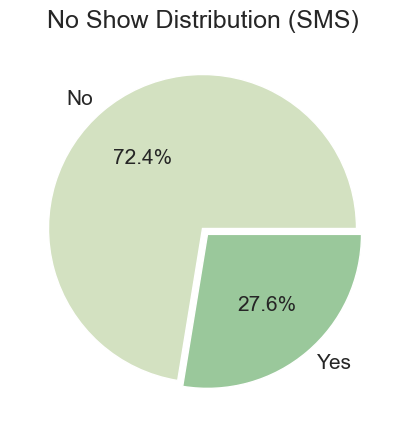

In [116]:
print(text['No_Show'].value_counts())

Rec = text['No_Show'].value_counts()[1]/(text['No_Show'].value_counts()[0] + text['No_Show'].value_counts()[1])
print("\n{:.0f}% of No Show Patients received SMS.\n".format(Rec*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution (SMS)')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(text['No_Show'].value_counts(), labels= text['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


No_Show
No     62510
Yes    12530
Name: count, dtype: int64

17% of No Show Patients did not received SMS.



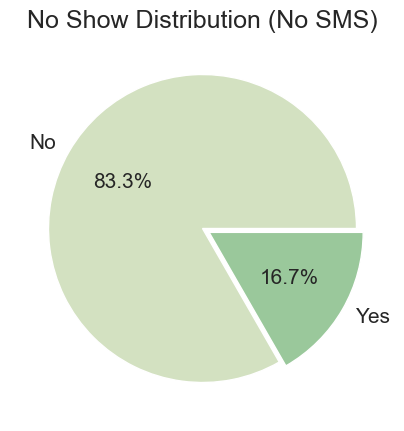

In [117]:
print(no_text['No_Show'].value_counts())

No = no_text['No_Show'].value_counts()[1]/(no_text['No_Show'].value_counts()[0] + no_text['No_Show'].value_counts()[1])
print("\n{:.0f}% of No Show Patients did not received SMS.\n".format(No*100))


plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)
plt.title('No Show Distribution (No SMS)')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 


plt.pie(no_text['No_Show'].value_counts(), labels= no_text['No_Show'].value_counts().index, colors = palette_color, explode=explode, autopct='%.1f%%');


#### It can be said that sending reminder text messages to patients is not a factor for no show ups as patients that received SMS actually had a higher percentage of No Show than those that did not receive SMS. 

## All Insights and Recommendations:

- 20% of patients did not show up for their scheduled appointments.
- Minors, young persons and young adults (0 - 20) were the age group that missed the most appointments. This can not be totally blamed on these age group patients but on their adult parents or guardians. Introduction of a **No Show up fine** is recommended to curb this pattern. It is also recommended that SMS reminders are sent to patients or their guardians hours before.
- Neighbourhood is not a factor for no shows but the hospital can consider offering taxi and ambulance service to patients at a discounted rate.
- Female dominated the No show up and show up list.
- Wednesday has the highest appointments and Saturday has the lowest appointments. 
The higher the appointments scheduled; the higher the no shows; the lower the appointments scheduled; the lower the no shows.
The hospital should consider evenly distributing the appointments.
- The average waiting period is 10 days. It was observed the higher the wait period; the higher the no show. Same day appointments had the lowest percentage of no shows. It is suggested that the hospital should consider reducing the wait time to encourage patients to show up for their appointments.
- Patients with insurance cover were more likely not to show up for their appointment than those that did not have insurance cover.
- Ailments is not a major factor for not showing up as more patients showed up. However, considering the percentage (17 - 20%) of patients with serious ailments not showing up, considering seeing the doctor is important for their, this % can be said to be reasonably high. Text reminders of appointments are suggested to help curb this.
- Receiving reminder text is not a major factor for showing or not showing up for appointments as most patients that did not receive texts showed up more than those received text.